<a href="https://colab.research.google.com/github/vaishnavi3013/Analysis-of-Bank-Marketing-Dataset/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile('drive/MyDrive/bank+marketing.zip','r') as zipObj:
  zipObj.extractall('drive/MyDrive/bank')

In [ ]:
with ZipFile('drive/MyDrive/bank/bank.zip','r') as zipObj:
  zipObj.extractall('drive/MyDrive/bankm')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# allow plots to appear directly in the notebook
%matplotlib inline
data= pd.read_csv('/content/drive/MyDrive/bankm/bank-full.csv',sep=';')

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
data.shape

(45211, 17)

In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].unique())
  print(data.iloc[:,i].value_counts())

[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
['married' 'single' 'divorced']
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
['tertiary' 'secondary' 'unknown' 'primary']
secondary 

In [ ]:
age_bins = [0, 31, 61, 90, 100]
age_labels = ['0-30', '31-60', '61-90', '91+']
data['age'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)
print(data)

         age           job   marital  education default  balance housing loan  \
0      31-60    management   married   tertiary      no     2143     yes   no   
1      31-60    technician    single  secondary      no       29     yes   no   
2      31-60  entrepreneur   married  secondary      no        2     yes  yes   
3      31-60   blue-collar   married    unknown      no     1506     yes   no   
4      31-60       unknown    single    unknown      no        1      no   no   
...      ...           ...       ...        ...     ...      ...     ...  ...   
45206  31-60    technician   married   tertiary      no      825      no   no   
45207  61-90       retired  divorced    primary      no     1729      no   no   
45208  61-90       retired   married  secondary      no     5715      no   no   
45209  31-60   blue-collar   married  secondary      no      668      no   no   
45210  31-60  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month

In [ ]:
balance_bins = [0, 501, 1001, 1501, 2000, 2500, 4000]
balance_labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2000-2500', '2500+']
data['balance'] = pd.cut(data['balance'], bins=balance_bins, labels=balance_labels)
print(data)

         age           job   marital  education default    balance housing  \
0      31-60    management   married   tertiary      no  2000-2500     yes   
1      31-60    technician    single  secondary      no      0-500     yes   
2      31-60  entrepreneur   married  secondary      no      0-500     yes   
3      31-60   blue-collar   married    unknown      no  1501-2000     yes   
4      31-60       unknown    single    unknown      no      0-500      no   
...      ...           ...       ...        ...     ...        ...     ...   
45206  31-60    technician   married   tertiary      no   501-1000      no   
45207  61-90       retired  divorced    primary      no  1501-2000      no   
45208  61-90       retired   married  secondary      no        NaN      no   
45209  31-60   blue-collar   married  secondary      no   501-1000      no   
45210  31-60  entrepreneur   married  secondary      no      2500+      no   

      loan    contact  day month  duration  campaign  pdays  pr

In [ ]:
previous_bins = [0, 11, 21, 31, 41, 50, 100]
previous_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '50+']
data['previous'] = pd.cut(data['previous'], bins=previous_bins, labels=previous_labels)
print(data)

         age           job   marital  education default    balance housing  \
0      31-60    management   married   tertiary      no  2000-2500     yes   
1      31-60    technician    single  secondary      no      0-500     yes   
2      31-60  entrepreneur   married  secondary      no      0-500     yes   
3      31-60   blue-collar   married    unknown      no  1501-2000     yes   
4      31-60       unknown    single    unknown      no      0-500      no   
...      ...           ...       ...        ...     ...        ...     ...   
45206  31-60    technician   married   tertiary      no   501-1000      no   
45207  61-90       retired  divorced    primary      no  1501-2000      no   
45208  61-90       retired   married  secondary      no        NaN      no   
45209  31-60   blue-collar   married  secondary      no   501-1000      no   
45210  31-60  entrepreneur   married  secondary      no      2500+      no   

      loan    contact  day month  duration  campaign  pdays pre

In [ ]:
duration_bins = [0, 101, 201, 301, 401, 500, 1000]
duration_labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '500+']
data['duration'] = pd.cut(data['duration'], bins=duration_bins, labels=duration_labels)
print(data)

         age           job   marital  education default    balance housing  \
0      31-60    management   married   tertiary      no  2000-2500     yes   
1      31-60    technician    single  secondary      no      0-500     yes   
2      31-60  entrepreneur   married  secondary      no      0-500     yes   
3      31-60   blue-collar   married    unknown      no  1501-2000     yes   
4      31-60       unknown    single    unknown      no      0-500      no   
...      ...           ...       ...        ...     ...        ...     ...   
45206  31-60    technician   married   tertiary      no   501-1000      no   
45207  61-90       retired  divorced    primary      no  1501-2000      no   
45208  61-90       retired   married  secondary      no        NaN      no   
45209  31-60   blue-collar   married  secondary      no   501-1000      no   
45210  31-60  entrepreneur   married  secondary      no      2500+      no   

      loan    contact  day month duration  campaign  pdays prev

<ipython-input-38-a117d4f76104>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='viridis')


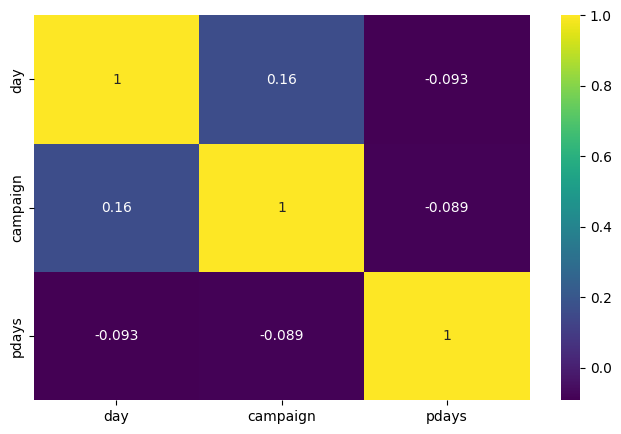

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(),annot=True,cmap='viridis')
plt.show()

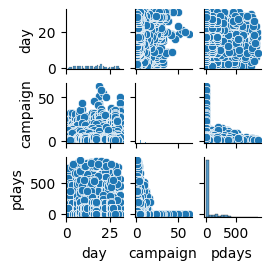

In [ ]:
sns.pairplot(data,height=0.9,aspect=1)

In [ ]:
data.replace(to_replace=-1, value=0,inplace=True)
data["y"] = data["y"].replace({'no': 0, 'yes': 1})
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31-60,management,married,tertiary,no,2000-2500,yes,no,unknown,5,may,201-300,1,0,NaN,unknown,0
1,31-60,technician,single,secondary,no,0-500,yes,no,unknown,5,may,101-200,1,0,NaN,unknown,0
2,31-60,entrepreneur,married,secondary,no,0-500,yes,yes,unknown,5,may,0-100,1,0,NaN,unknown,0
3,31-60,blue-collar,married,unknown,no,1501-2000,yes,no,unknown,5,may,0-100,1,0,NaN,unknown,0
4,31-60,unknown,single,unknown,no,0-500,no,no,unknown,5,may,101-200,1,0,NaN,unknown,0


Text(0.5, 1.0, 'Bar Plot of Job with y')

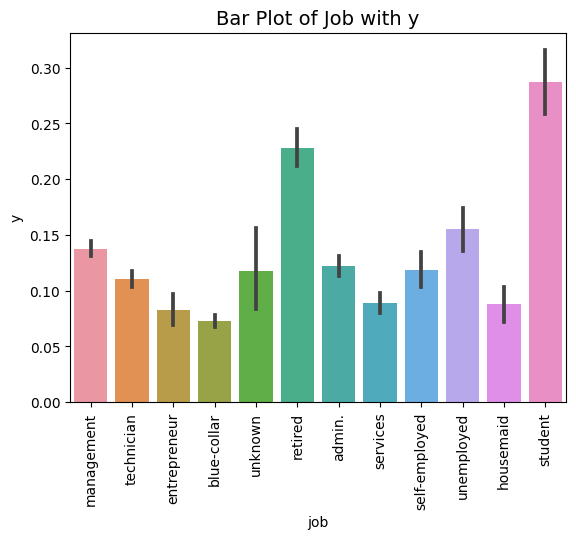

In [ ]:
plot = sns.barplot(x=data["job"],y=data["y"])
plot.set_xticklabels(plot.get_xticklabels(),rotation="vertical")
plot.set_title("Bar Plot of Job with y", fontsize=14)

Text(0.5, 1.0, 'Bar Plot of balance with y')

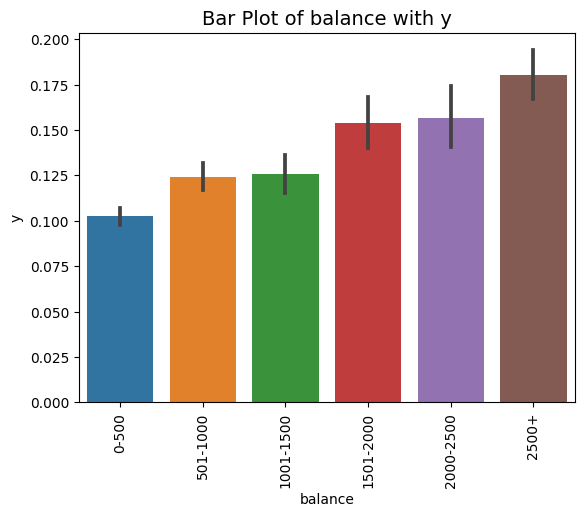

In [ ]:
plot = sns.barplot(x=data["balance"],y=data["y"])
plot.set_xticklabels(plot.get_xticklabels(),rotation="vertical")
plot.set_title("Bar Plot of balance with y", fontsize=14)

Text(0.5, 1.0, 'Bar Plot of duration with y')

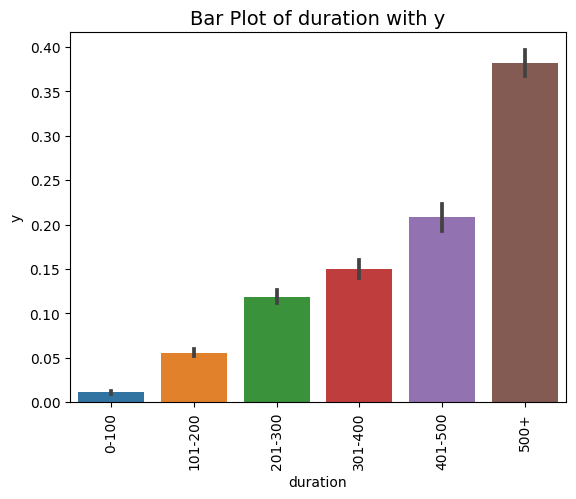

In [ ]:
plot = sns.barplot(x=data["duration"],y=data["y"])
plot.set_xticklabels(plot.get_xticklabels(),rotation="vertical")
plot.set_title("Bar Plot of duration with y", fontsize=14)

Text(0.5, 1.0, 'Bar Plot of education with y')

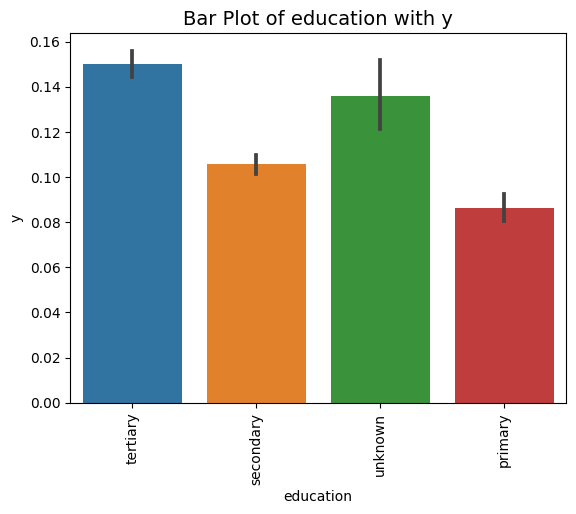

In [ ]:
plot = sns.barplot(x=data["education"],y=data["y"])
plot.set_xticklabels(plot.get_xticklabels(),rotation="vertical")
plot.set_title("Bar Plot of education with y", fontsize=14)

Text(0.5, 1.0, 'Bar Plot of previous with y')

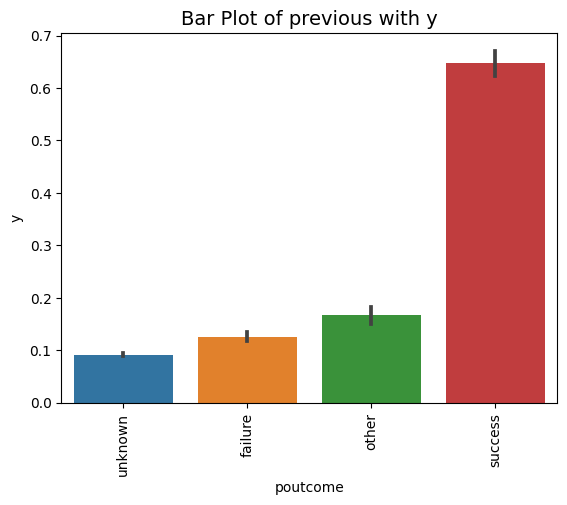

In [ ]:
plot = sns.barplot(x=data["poutcome"],y=data["y"])
plot.set_xticklabels(plot.get_xticklabels(),rotation="vertical")
plot.set_title("Bar Plot of previous with y", fontsize=14)

<Axes: xlabel='default', ylabel='y'>

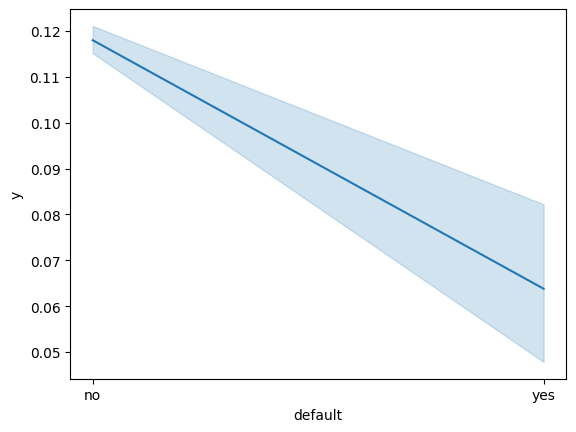

In [ ]:
sns.lineplot(x=data["default"],y=data["y"])

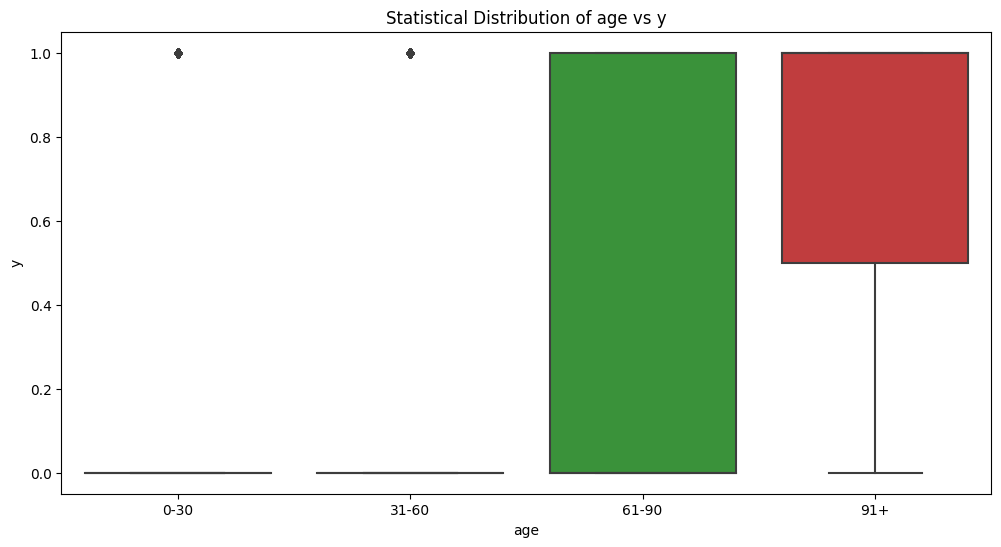

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot( x=data['age'], y=data['y'] )
plt.title('Statistical Distribution of age vs y')
plt.show()

<Axes: xlabel='housing', ylabel='y'>

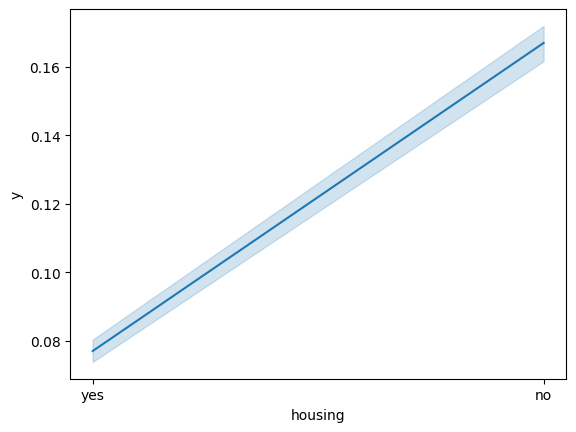

In [ ]:
sns.lineplot(x=data["housing"],y=data["y"])

<Axes: xlabel='loan', ylabel='y'>

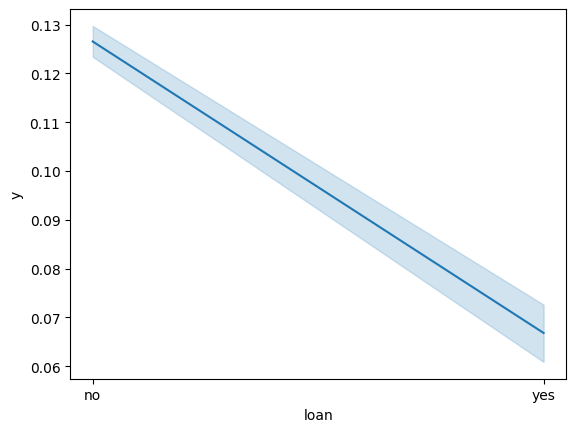

In [ ]:
sns.lineplot(x=data["loan"],y=data["y"])

In [ ]:
X=data.drop(['y'],axis=1)
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,31-60,management,married,tertiary,no,2000-2500,yes,no,unknown,5,may,201-300,1,0,NaN,unknown
1,31-60,technician,single,secondary,no,0-500,yes,no,unknown,5,may,101-200,1,0,NaN,unknown
2,31-60,entrepreneur,married,secondary,no,0-500,yes,yes,unknown,5,may,0-100,1,0,NaN,unknown
3,31-60,blue-collar,married,unknown,no,1501-2000,yes,no,unknown,5,may,0-100,1,0,NaN,unknown
4,31-60,unknown,single,unknown,no,0-500,no,no,unknown,5,may,101-200,1,0,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,31-60,technician,married,tertiary,no,501-1000,no,no,cellular,17,nov,500+,3,0,NaN,unknown
45207,61-90,retired,divorced,primary,no,1501-2000,no,no,cellular,17,nov,401-500,2,0,NaN,unknown
45208,61-90,retired,married,secondary,no,NaN,no,no,cellular,17,nov,NaN,5,184,0-10,success
45209,31-60,blue-collar,married,secondary,no,501-1000,no,no,telephone,17,nov,500+,4,0,NaN,unknown


In [ ]:
y = data['y']
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [ ]:
X= pd.get_dummies(X, drop_first=True)
X

,day,campaign,pdays,age_31-60,age_61-90,age_91+,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,duration_401-500,duration_500+,previous_11-20,previous_21-30,previous_31-40,previous_41-50,previous_50+,poutcome_other,poutcome_success,poutcome_unknown
0,5,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,5,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,17,3,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
45207,17,2,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
45208,17,5,184,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
45209,17,4,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
y= pd.get_dummies(y, drop_first=True)
y

,1
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31647, 56)
(13564, 56)
(31647, 1)
(13564, 1)


In [ ]:
from sklearn.linear_model import LogisticRegression
lgst = LogisticRegression(C=1e9)
lgst_model = lgst.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
lgst_pred = lgst.predict(X_test)
lgst_acc = accuracy_score(y_test,lgst_pred)

In [ ]:
print("Accuracy of Logistic Regression: {:.2f}%".format(lgst_acc*100))

Accuracy of Logistic Regression: 89.27%


In [ ]:
def get_test_result(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test,test_pred))

In [ ]:
test_result=get_test_result(lgst_model)
print(test_result)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11962
           1       0.62      0.23      0.34      1602

    accuracy                           0.89     13564
   macro avg       0.76      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.linear_model import LogisticRegression
lgst = LogisticRegression(C=1e9)
lgst_model = lgst.fit(X_train,y_train)
lgst_pred = lgst.predict(X_test)
lgst_acc = accuracy_score(y_test,lgst_pred)
print("Accuracy of Logistic Regression: {:.2f}%".format(lgst_acc*100))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Logistic Regression: 89.49%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
from sklearn.linear_model import LogisticRegression
lgst = LogisticRegression(C=1e9)
lgst_model = lgst.fit(X_train,y_train)
lgst_pred = lgst.predict(X_test)
lgst_acc = accuracy_score(y_test,lgst_pred)
print("Accuracy of Logistic Regression: {:.2f}%".format(lgst_acc*100))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Logistic Regression: 89.64%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)
from sklearn.linear_model import LogisticRegression
lgst = LogisticRegression(C=1e9)
lgst_model = lgst.fit(X_train,y_train)
lgst_pred = lgst.predict(X_test)
lgst_acc = accuracy_score(y_test,lgst_pred)
print("Accuracy of Logistic Regression: {:.2f}%".format(lgst_acc*100))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Logistic Regression: 89.57%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree Classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Define model. Specify a number for random_state to ensure same results each run
bank_model = DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=10)

#Fit model
bank_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1)

In [ ]:
pred=bank_model.predict(X_test)
bank_acc = accuracy_score(y_test,pred)
print(pred)

[0 0 0 ... 0 0 0]


In [ ]:
print("Accuracy of Logistic Regression: {:.2f}%".format(bank_acc*100))

Accuracy of Logistic Regression: 89.01%


In [ ]:
def get_test_result(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test,test_pred))

In [ ]:
test_result=get_test_result(bank_model)
print(test_result)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7980
           1       0.56      0.32      0.40      1063

    accuracy                           0.89      9043
   macro avg       0.74      0.64      0.67      9043
weighted avg       0.87      0.89      0.88      9043



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)
from sklearn.tree import DecisionTreeClassifier
bank_model = DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=10)
bank_model.fit(X_train,y_train)
pred=bank_model.predict(X_test)
bank_acc = accuracy_score(y_test,pred)
print(pred)
print("Accuracy of Logistic Regression: {:.2f}%".format(bank_acc*100))

[0 0 0 ... 0 0 0]
Accuracy of Logistic Regression: 88.99%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
from sklearn.tree import DecisionTreeClassifier
bank_model = DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=10)
bank_model.fit(X_train,y_train)
pred=bank_model.predict(X_test)
bank_acc = accuracy_score(y_test,pred)
print(pred)
print("Accuracy of Logistic Regression: {:.2f}%".format(bank_acc*100))

[0 0 0 ... 0 0 0]
Accuracy of Logistic Regression: 89.05%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,random_state=0)
from sklearn.tree import DecisionTreeClassifier
bank_model = DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=10)
bank_model.fit(X_train,y_train)
pred=bank_model.predict(X_test)
bank_acc = accuracy_score(y_test,pred)
print(pred)
print("Accuracy of Logistic Regression: {:.2f}%".format(bank_acc*100))

[0 0 0 ... 0 1 0]
Accuracy of Logistic Regression: 88.98%


Random Forest Classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest_model = RandomForestClassifier(random_state=1)

In [ ]:
forest_model.fit(X_train,y_train)

<ipython-input-157-2084ede82c1c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train,y_train)


RandomForestClassifier(random_state=1)

In [ ]:
preds=forest_model.predict(X_test)
bank_acc = accuracy_score(y_test,preds)
print(preds)

[0 0 0 ... 0 0 1]


In [ ]:
print("Accuracy of Logistic Regression: {:.2f}%".format(bank_acc*100))

Accuracy of Logistic Regression: 89.30%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(X_train,y_train)
preds=forest_model.predict(X_test)
bank_acc = accuracy_score(y_test,preds)
print(preds)
print("Accuracy of Logistic Regression: {:.2f}%".format(bank_acc*100))

<ipython-input-160-ca5e16b4f6e7>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train,y_train)


[0 0 0 ... 0 0 0]
Accuracy of Logistic Regression: 89.23%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(X_train,y_train)
preds=forest_model.predict(X_test)
bank_acc = accuracy_score(y_test,preds)
print(preds)
print("Accuracy of Logistic Regression: {:.2f}%".format(bank_acc*100))

<ipython-input-161-6b05fd8e4347>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train,y_train)


[0 0 0 ... 0 0 0]
Accuracy of Logistic Regression: 89.30%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,random_state=0)
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(X_train,y_train)
preds=forest_model.predict(X_test)
bank_acc = accuracy_score(y_test,preds)
print(preds)
print("Accuracy of Logistic Regression: {:.2f}%".format(bank_acc*100))

<ipython-input-162-1f140611dd53>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train,y_train)


[0 0 0 ... 0 1 0]
Accuracy of Logistic Regression: 89.32%


Support Vector Classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model= SVC(kernel='rbf')

In [ ]:
svc_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
preds=svc_model.predict(X_test)
bank_acc = accuracy_score(y_test,preds)
print(preds)

[0 0 0 ... 0 0 0]


In [ ]:
print("Accuracy of Logistic Regression: {:.2f}%".format(bank_acc*100))

Accuracy of Logistic Regression: 88.25%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)
from sklearn.svm import SVC
svc_model= SVC(kernel='rbf')
svc_model.fit(X_train,y_train)
preds=svc_model.predict(X_test)
bank_acc = accuracy_score(y_test,preds)
print(preds)
print("Accuracy of Logistic Regression: {:.2f}%".format(bank_acc*100))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 0 ... 0 0 0]
Accuracy of Logistic Regression: 88.28%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
from sklearn.svm import SVC
svc_model= SVC(kernel='rbf')
svc_model.fit(X_train,y_train)
preds=svc_model.predict(X_test)
bank_acc = accuracy_score(y_test,preds)
print(preds)
print("Accuracy of Logistic Regression: {:.2f}%".format(bank_acc*100))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 0 ... 0 0 0]
Accuracy of Logistic Regression: 88.24%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,random_state=0)
from sklearn.svm import SVC
svc_model= SVC(kernel='rbf')
svc_model.fit(X_train,y_train)
preds=svc_model.predict(X_test)
bank_acc = accuracy_score(y_test,preds)
print(preds)
print("Accuracy of Logistic Regression: {:.2f}%".format(bank_acc*100))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 0 ... 0 0 0]
Accuracy of Logistic Regression: 88.23%


K-Neighbours Classification

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train,y_train)
preds=knn_model.predict(X_test)
bank_acc = accuracy_score(y_test,preds)
print(preds)
print("Accuracy of Logistic Regression: {:.2f}%".format(bank_acc*100))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[0 0 0 ... 0 0 0]
Accuracy of Logistic Regression: 89.01%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train,y_train)
preds=knn_model.predict(X_test)
bank_acc = accuracy_score(y_test,preds)
print(preds)
print("Accuracy of Logistic Regression: {:.2f}%".format(bank_acc*100))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[0 0 0 ... 0 0 0]
Accuracy of Logistic Regression: 88.88%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train,y_train)
preds=knn_model.predict(X_test)
bank_acc = accuracy_score(y_test,preds)
print(preds)
print("Accuracy of Logistic Regression: {:.2f}%".format(bank_acc*100))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[0 0 0 ... 0 0 0]
Accuracy of Logistic Regression: 88.85%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,random_state=0)
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train,y_train)
preds=knn_model.predict(X_test)
bank_acc = accuracy_score(y_test,preds)
print(preds)
print("Accuracy of Logistic Regression: {:.2f}%".format(bank_acc*100))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[0 0 0 ... 0 0 0]
Accuracy of Logistic Regression: 88.88%


K-means Clustering

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
from sklearn.cluster import KMeans
kmeans_model= KMeans(n_clusters=2)
kmeans_model.fit(X_train,y_train)
preds=kmeans_model.predict(X_test)
bank_acc = accuracy_score(y_test,preds)
print(preds)
print("Accuracy of Logistic Regression: {:.2f}%".format(bank_acc*100))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 ... 0 0 0]
Accuracy of Logistic Regression: 80.00%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)
from sklearn.cluster import KMeans
kmeans_model= KMeans(n_clusters=2)
kmeans_model.fit(X_train,y_train)
preds=kmeans_model.predict(X_test)
bank_acc = accuracy_score(y_test,preds)
print(preds)
print("Accuracy of Logistic Regression: {:.2f}%".format(bank_acc*100))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 ... 0 0 0]
Accuracy of Logistic Regression: 80.17%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
from sklearn.cluster import KMeans
kmeans_model= KMeans(n_clusters=2)
kmeans_model.fit(X_train,y_train)
preds=kmeans_model.predict(X_test)
bank_acc = accuracy_score(y_test,preds)
print(preds)
print("Accuracy of Logistic Regression: {:.2f}%".format(bank_acc*100))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 ... 0 0 1]
Accuracy of Logistic Regression: 80.03%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,random_state=0)
from sklearn.cluster import KMeans
kmeans_model= KMeans(n_clusters=2)
kmeans_model.fit(X_train,y_train)
preds=kmeans_model.predict(X_test)
bank_acc = accuracy_score(y_test,preds)
print(preds)
print("Accuracy of Logistic Regression: {:.2f}%".format(bank_acc*100))

NameError: ignored